# English Premier League -  Top 4 Prediction for 2017/18

## Import Dependencies

In [307]:
from time import time
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.utils import shuffle
from sklearn import svm
from sklearn import tree, neighbors
from sklearn import preprocessing
from xgboost import XGBClassifier
from matplotlib.colors import ListedColormap
from IPython.display import Image
import pandas as pd
import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import seaborn as sns
import matplotlib.pyplot as plt
import random
import plotly.plotly as py
import plotly.graph_objs as go
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

## 1. Getting data from the official EPL website

## a. Web scraping

Using Scrapy attribution 'startproject' to organize scrapying codes in the other folders. You can check the codes in crawler files.
The code below are the example of web scrapying of the standing tables from 2010 to 2018. I wrote codes in the py files and executed in the prompt command.

In [ ]:
import scrapy
import time
from selenium import webdriver
from selenium.webdriver.support.select import Select
from scrapy.selector import Selector
from test_crawler.items import TestItem

class TestItem(scrapy.Item):
    club_name = scrapy.Field()
    position = scrapy.Field()
    won = scrapy.Field()
    drawn = scrapy.Field()
    lost = scrapy.Field()
    goal = scrapy.Field()
    goal_against = scrapy.Field()
    points = scrapy.Field()

class TESTSpider(scrapy.Spider):
    name = "Test"
    allowed_domains = ["premierleague.com"]
    start_urls = ["https://www.premierleague.com/tables"]
    
    def __init__(self):
        scrapy.Spider.__init__(self)
        self.browser = webdriver.Chrome("C:\sta\chromedriver.exe")
    
    def parse(self, response):
        self.browser.get(response.url)
        time.sleep(5)
#2017/18
        html = self.browser.find_element_by_xpath('//*').get_attribute('outerHTML')
        selector = Selector(text=html)
        rows = selector.xpath('//*[@id="mainContent"]/div[2]/div[1]/div[3]/div/div/div/table/tbody/tr[not(@class="expandable")]')
        for row in rows:
            item = TestItem()
            item["club_name"] = row.xpath('./td[3]/a/span[2]/text()')[0].extract()
            item["position"] = row.xpath('./td[2]/span[1]/text()')[0].extract()
            item["won"] = row.xpath('./td[5]/text()')[0].extract()
            item["lost"] = row.xpath('./td[7]/text()')[0].extract()
            item["drawn"] = row.xpath('./td[6]/text()')[0].extract()
            item["goal"] = row.xpath('./td[8]/text()')[0].extract()
            item["goal_against"] = row.xpath('./td[9]/text()')[0].extract()
            item["points"] = row.xpath('./td[11]/text()')[0].extract()
            yield item
#2016/17
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/section/div[2]/div[2]').click()
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/section/div[2]/ul/li[2]').click()
        time.sleep(8)
        html = self.browser.find_element_by_xpath('//*').get_attribute('outerHTML')
        selector = Selector(text=html)
        
        rows = selector.xpath('//*[@id="mainContent"]/div[2]/div[1]/div[3]/div/div/div/table/tbody/tr[not(@class="expandable")]')
        for row in rows:
            item = TestItem()
            item["club_name"] = row.xpath('./td[3]/a/span[2]/text()')[0].extract()
            item["position"] = row.xpath('./td[2]/span[1]/text()')[0].extract()
            item["won"] = row.xpath('./td[5]/text()')[0].extract()
            item["lost"] = row.xpath('./td[7]/text()')[0].extract()
            item["drawn"] = row.xpath('./td[6]/text()')[0].extract()
            item["goal"] = row.xpath('./td[8]/text()')[0].extract()
            item["goal_against"] = row.xpath('./td[9]/text()')[0].extract()
            item["points"] = row.xpath('./td[11]/text()')[0].extract()
            yield item
#2015/16
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/section/div[2]/div[2]').click()
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/section/div[2]/ul/li[3]').click()
        time.sleep(8)
        html = self.browser.find_element_by_xpath('//*').get_attribute('outerHTML')
        selector = Selector(text=html)
        
        rows = selector.xpath('//*[@id="mainContent"]/div[2]/div[1]/div[3]/div/div/div/table/tbody/tr[not(@class="expandable")]')
        for row in rows:
            item = TestItem()
            item["club_name"] = row.xpath('./td[3]/a/span[2]/text()')[0].extract()
            item["position"] = row.xpath('./td[2]/span[1]/text()')[0].extract()
            item["won"] = row.xpath('./td[5]/text()')[0].extract()
            item["lost"] = row.xpath('./td[7]/text()')[0].extract()
            item["drawn"] = row.xpath('./td[6]/text()')[0].extract()
            item["goal"] = row.xpath('./td[8]/text()')[0].extract()
            item["goal_against"] = row.xpath('./td[9]/text()')[0].extract()
            item["points"] = row.xpath('./td[11]/text()')[0].extract()
            yield item
#2014/15
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/section/div[2]/div[2]').click()
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/section/div[2]/ul/li[4]').click()
        time.sleep(8)
        html = self.browser.find_element_by_xpath('//*').get_attribute('outerHTML')
        selector = Selector(text=html)
        
        rows = selector.xpath('//*[@id="mainContent"]/div[2]/div[1]/div[3]/div/div/div/table/tbody/tr[not(@class="expandable")]')
        for row in rows:
            item = TestItem()
            item["club_name"] = row.xpath('./td[3]/a/span[2]/text()')[0].extract()
            item["position"] = row.xpath('./td[2]/span[1]/text()')[0].extract()
            item["won"] = row.xpath('./td[5]/text()')[0].extract()
            item["lost"] = row.xpath('./td[7]/text()')[0].extract()
            item["drawn"] = row.xpath('./td[6]/text()')[0].extract()
            item["goal"] = row.xpath('./td[8]/text()')[0].extract()
            item["goal_against"] = row.xpath('./td[9]/text()')[0].extract()
            item["points"] = row.xpath('./td[11]/text()')[0].extract()
            yield item
#2013/14
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/section/div[2]/div[2]').click()
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/section/div[2]/ul/li[5]').click()
        time.sleep(8)
        html = self.browser.find_element_by_xpath('//*').get_attribute('outerHTML')
        selector = Selector(text=html)
        
        rows = selector.xpath('//*[@id="mainContent"]/div[2]/div[1]/div[3]/div/div/div/table/tbody/tr[not(@class="expandable")]')
        for row in rows:
            item = TestItem()
            item["club_name"] = row.xpath('./td[3]/a/span[2]/text()')[0].extract()
            item["position"] = row.xpath('./td[2]/span[1]/text()')[0].extract()
            item["won"] = row.xpath('./td[5]/text()')[0].extract()
            item["lost"] = row.xpath('./td[7]/text()')[0].extract()
            item["drawn"] = row.xpath('./td[6]/text()')[0].extract()
            item["goal"] = row.xpath('./td[8]/text()')[0].extract()
            item["goal_against"] = row.xpath('./td[9]/text()')[0].extract()
            item["points"] = row.xpath('./td[11]/text()')[0].extract()
            yield item
#2012/13
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/section/div[2]/div[2]').click()
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/section/div[2]/ul/li[6]').click()
        time.sleep(8)
        html = self.browser.find_element_by_xpath('//*').get_attribute('outerHTML')
        selector = Selector(text=html)
        
        rows = selector.xpath('//*[@id="mainContent"]/div[2]/div[1]/div[3]/div/div/div/table/tbody/tr[not(@class="expandable")]')
        for row in rows:
            item = TestItem()
            item["club_name"] = row.xpath('./td[3]/a/span[2]/text()')[0].extract()
            item["position"] = row.xpath('./td[2]/span[1]/text()')[0].extract()
            item["won"] = row.xpath('./td[5]/text()')[0].extract()
            item["lost"] = row.xpath('./td[7]/text()')[0].extract()
            item["drawn"] = row.xpath('./td[6]/text()')[0].extract()
            item["goal"] = row.xpath('./td[8]/text()')[0].extract()
            item["goal_against"] = row.xpath('./td[9]/text()')[0].extract()
            item["points"] = row.xpath('./td[11]/text()')[0].extract()
            yield item
#2011/12
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/section/div[2]/div[2]').click()
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/section/div[2]/ul/li[7]').click()
        time.sleep(8)
        html = self.browser.find_element_by_xpath('//*').get_attribute('outerHTML')
        selector = Selector(text=html)
        
        rows = selector.xpath('//*[@id="mainContent"]/div[2]/div[1]/div[3]/div/div/div/table/tbody/tr[not(@class="expandable")]')
        for row in rows:
            item = TestItem()
            item["club_name"] = row.xpath('./td[3]/a/span[2]/text()')[0].extract()
            item["position"] = row.xpath('./td[2]/span[1]/text()')[0].extract()
            item["won"] = row.xpath('./td[5]/text()')[0].extract()
            item["lost"] = row.xpath('./td[7]/text()')[0].extract()
            item["drawn"] = row.xpath('./td[6]/text()')[0].extract()
            item["goal"] = row.xpath('./td[8]/text()')[0].extract()
            item["goal_against"] = row.xpath('./td[9]/text()')[0].extract()
            item["points"] = row.xpath('./td[11]/text()')[0].extract()
            yield item
#2010/11
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/section/div[2]/div[2]').click()
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[2]/div[1]/section/div[2]/ul/li[8]').click()
        time.sleep(8)
        html = self.browser.find_element_by_xpath('//*').get_attribute('outerHTML')
        selector = Selector(text=html)
        
        rows = selector.xpath('//*[@id="mainContent"]/div[2]/div[1]/div[3]/div/div/div/table/tbody/tr[not(@class="expandable")]')
        for row in rows:
            item = TestItem()
            item["club_name"] = row.xpath('./td[3]/a/span[2]/text()')[0].extract()
            item["position"] = row.xpath('./td[2]/span[1]/text()')[0].extract()
            item["won"] = row.xpath('./td[5]/text()')[0].extract()
            item["lost"] = row.xpath('./td[7]/text()')[0].extract()
            item["drawn"] = row.xpath('./td[6]/text()')[0].extract()
            item["goal"] = row.xpath('./td[8]/text()')[0].extract()
            item["goal_against"] = row.xpath('./td[9]/text()')[0].extract()
            item["points"] = row.xpath('./td[11]/text()')[0].extract()
            yield item

## 2. Exploring Data Analysis
## a. Data Cleaning
### Load tables from 2010 to 2018

In [166]:
tables = pd.read_csv('/Users/hyunilyoo/Documents/analytics/epl_prediction/tables_crawler/table.csv')
tables

club_name  drawn  goal  goal_against  lost  points  \
0             Manchester City      3    83            20     1      78   
1           Manchester United      5    58            23     5      65   
2                   Liverpool      9    68            34     4      60   
3           Tottenham Hotspur      7    55            24     5      58   
4                     Chelsea      5    52            27     8      56   
5                     Arsenal      6    52            41    10      45   
6                     Burnley     10    27            26     9      43   
7              Leicester City     10    45            43    10      40   
8                     Everton      7    35            49    13      37   
9                     Watford      6    39            47    13      36   
10   Brighton and Hove Albion     10    28            40    12      34   
11                Bournemouth      9    34            44    12      33   
12           Newcastle United      8    30            40    14      32   
13               Swansea City      7    25            42    15      31   
14          Huddersfield Town      7    25            50    15      31   
15            West Ham United      9    36            57    14      30   
16                Southampton     13    29            44    12      28   
17             Crystal Palace      9    28            48    15      27   
18                 Stoke City      9    28            54    14      27   
19       West Bromwich Albion     11    23            47    16      20   
20                    Chelsea      3    85            33     5      93   
21          Tottenham Hotspur      8    86            26     4      86   
22            Manchester City      9    80            39     6      78   
23                  Liverpool     10    78            42     6      76   
24                    Arsenal      6    77            44     9      75   
25          Manchester United     15    54            29     5      69   
26                    Everton     10    62            44    11      61   
27                Southampton     10    41            48    16      46   
28                Bournemouth     10    55            67    16      46   
29       West Bromwich Albion      9    43            51    17      45   
..                        ...    ...   ...           ...   ...     ...   
130              Swansea City     11    44            51    15      47   
131              Norwich City     11    52            66    15      47   
132                Sunderland     12    45            46    15      45   
133                Stoke City     12    36            53    15      45   
134            Wigan Athletic     10    42            62    17      43   
135               Aston Villa     17    37            53    14      38   
136       Queens Park Rangers      7    43            66    21      37   
137          Bolton Wanderers      6    46            77    22      36   
138          Blackburn Rovers      7    48            78    23      31   
139   Wolverhampton Wanderers     10    40            82    23      25   
140         Manchester United     11    78            37     4      80   
141                   Chelsea      8    69            33     9      71   
142           Manchester City      8    60            33     9      71   
143                   Arsenal     11    72            43     8      68   
144         Tottenham Hotspur     14    55            46     8      62   
145                 Liverpool      7    59            44    14      58   
146                   Everton     15    51            45    10      54   
147                    Fulham     16    49            43    11      49   
148               Aston Villa     12    48            59    14      48   
149                Sunderland     11    45            56    15      47   
150      West Bromwich Albion     11    56            71    15      47   
151          Newcastle United     13    56            57    14      46   
152                Stoke

### Checking the data types if there are values that need to be converted to either numeric or object values.

In [167]:
tables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 8 columns):
club_name       160 non-null object
drawn           160 non-null int64
goal            160 non-null int64
goal_against    160 non-null int64
lost            160 non-null int64
points          160 non-null int64
position        160 non-null int64
won             160 non-null int64
dtypes: int64(7), object(1)
memory usage: 10.1+ KB


### Converting 'position' to object value

In [168]:
tables['position'] = tables['position'].astype('str')

### Since my interest is predicting the top 4 on the table for 2017/18, I extracted the top 4 teams from 2010 to 2018.

In [170]:
top4_tables = tables[(tables['position'] == '1')|(tables['position'] == '2')|
                     (tables['position'] == '3')|(tables['position'] == '4')]

top4_tables

club_name  drawn  goal  goal_against  lost  points position  won
0      Manchester City      3    83            20     1      78        1   25
1    Manchester United      5    58            23     5      65        2   20
2            Liverpool      9    68            34     4      60        3   17
3    Tottenham Hotspur      7    55            24     5      58        4   17
20             Chelsea      3    85            33     5      93        1   30
21   Tottenham Hotspur      8    86            26     4      86        2   26
22     Manchester City      9    80            39     6      78        3   23
23           Liverpool     10    78            42     6      76        4   22
40      Leicester City     12    68            36     3      81        1   23
41             Arsenal     11    65            36     7      71        2   20
42   Tottenham Hotspur     13    69            35     6      70        3   19
43     Manchester City      9    71            41    10      66        4   19
60             Chelsea      9    73            32     3      87        1   26
61     Manchester City      7    83            38     7      79        2   24
62             Arsenal      9    71            36     7      75        3   22
63   Manchester United     10    62            37     8      70        4   20
80     Manchester City      5   102            37     6      86        1   27
81           Liverpool      6   101            50     6      84        2   26
82             Chelsea      7    71            27     6      82        3   25
83             Arsenal      7    68            41     7      79        4   24
100  Manchester United      5    86            43     5      89        1   28
101    Manchester City      9    66            34     6      78        2   23
102            Chelsea      9    75            39     7      75        3   22
103            Arsenal     10    72            37     7      73        4   21
120    Manchester City      5    93            29     5      89        1   28
121  Manchester United      5    89            33     5      89        2   28
122            Arsenal      7    74            49    10      70        3   21
123  Tottenham Hotspur      9    66            41     9      69        4   20
140  Manchester United     11    78            37     4      80        1   23
141            Chelsea      8    69            33     9      71        2   21
142    Manchester City      8    60            33     9      71        3   21
143            Arsenal     11    72            43     8      68        4   19

### Here are the list of teams and the years who were on Top 4 in past 8 years
Manchester City: 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010  
Manchester United: 2017, 2014, 2012, 2011, 2010  
Arsenal: 2015, 2014, 2013, 2012, 2011, 2010  
Chelsea: 2016, 2014, 2013, 2012, 2010  
Liverpool: 2017, 2016, 2013   
Tottenham Hotspur: 2017, 2016, 2015, 2011  
Leicester City: 2015

### Here is another example of web scraping for each team's match statistics
Code for getting Chelsea's match statistics

In [ ]:
import scrapy
import time
from selenium import webdriver
from selenium.webdriver.support.select import Select
from scrapy.selector import Selector
from clubstats_crawler.items import ClubItem

class CLUBSpider(scrapy.Spider):
    name = "Chelstats"
    allowed_domains = ["premierleague.com"]
    start_urls = [
        "https://www.premierleague.com/clubs/4/Chelsea/stats?se=54"
    ]A

    def __init__(self):
        scrapy.Spider.__init__(self)
        self.browser = webdriver.Chrome("C:\sta\chromedriver.exe")

    def parse(self, response):
        self.browser.get(response.url)
        time.sleep(5)
        html = self.browser.find_element_by_xpath('//*').get_attribute('outerHTML')
        selector = Selector(text=html)
# 2016/17
        item = ClubItem()
        item["club_name"] = selector.xpath('//*[@id="mainContent"]/header/div[2]/div/div/div[2]/h1/text()')[0].extract()
        item["goal_per_match"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[3]/span/span/text()')[0].extract()
        item["shot_on_target"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[5]/span/span/text()')[0].extract()
        item["shooting_accuracy"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[6]/span/span/text()')[0].extract()
        item["big_chance_created"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[8]/span/span/text()')[0].extract()
        item["pass_per_game"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[3]/span/span/text()')[0].extract()
        item["pass_accuracy"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[4]/span/span/text()')[0].extract()
        item["cross"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[5]/span/span/text()')[0].extract()
        item["cross_accuracy"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[6]/span/span/text()')[0].extract()
        item["goal_conceded_per_match"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[4]/span/span/text()')[0].extract()
        item["tackle_success"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[7]/span/span/text()')[0].extract()
        item["clearance"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[10]/span/span/text()')[0].extract()
        item["aerial_battles"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[12]/span/span/text()')[0].extract()
        item["interceptions"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[9]/span/span/text()')[0].extract()
        yield item

# 2014/15
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[3]/div/div/section/div[1]/div[2]').click()
        time.sleep(5)
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[3]/div/div/section/div[1]/ul/li[5]').click()
        time.sleep(5)
        html = self.browser.find_element_by_xpath('//*').get_attribute('outerHTML')
        selector = Selector(text=html)

        item = ClubItem()
        item["club_name"] = selector.xpath('//*[@id="mainContent"]/header/div[2]/div/div/div[2]/h1/text()')[0].extract()
        item["goal_per_match"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[3]/span/span/text()')[0].extract()
        item["shot_on_target"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[5]/span/span/text()')[0].extract()
        item["shooting_accuracy"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[6]/span/span/text()')[0].extract()
        item["big_chance_created"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[8]/span/span/text()')[0].extract()
        item["pass_per_game"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[3]/span/span/text()')[0].extract()
        item["pass_accuracy"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[4]/span/span/text()')[0].extract()
        item["cross"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[5]/span/span/text()')[0].extract()
        item["cross_accuracy"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[6]/span/span/text()')[0].extract()
        item["goal_conceded_per_match"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[4]/span/span/text()')[0].extract()
        item["tackle_success"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[7]/span/span/text()')[0].extract()
        item["clearance"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[10]/span/span/text()')[0].extract()
        item["aerial_battles"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[12]/span/span/text()')[0].extract()
        item["interceptions"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[9]/span/span/text()')[0].extract()
        yield item
# 2013/14
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[3]/div/div/section/div[1]/div[2]').click()
        time.sleep(3)
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[3]/div/div/section/div[1]/ul/li[6]').click()
        time.sleep(5)
        html = self.browser.find_element_by_xpath('//*').get_attribute('outerHTML')
        selector = Selector(text=html)

        item = ClubItem()
        item["club_name"] = selector.xpath('//*[@id="mainContent"]/header/div[2]/div/div/div[2]/h1/text()')[0].extract()
        item["goal_per_match"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[3]/span/span/text()')[0].extract()
        item["shot_on_target"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[5]/span/span/text()')[0].extract()
        item["shooting_accuracy"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[6]/span/span/text()')[0].extract()
        item["big_chance_created"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[8]/span/span/text()')[0].extract()
        item["pass_per_game"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[3]/span/span/text()')[0].extract()
        item["pass_accuracy"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[4]/span/span/text()')[0].extract()
        item["cross"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[5]/span/span/text()')[0].extract()
        item["cross_accuracy"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[6]/span/span/text()')[0].extract()
        item["goal_conceded_per_match"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[4]/span/span/text()')[0].extract()
        item["tackle_success"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[7]/span/span/text()')[0].extract()
        item["clearance"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[10]/span/span/text()')[0].extract()
        item["aerial_battles"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[12]/span/span/text()')[0].extract()
        item["interceptions"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[9]/span/span/text()')[0].extract()
        yield item
# 2012/13
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[3]/div/div/section/div[1]/div[2]').click()
        time.sleep(3)
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[3]/div/div/section/div[1]/ul/li[7]').click()
        time.sleep(5)
        html = self.browser.find_element_by_xpath('//*').get_attribute('outerHTML')
        selector = Selector(text=html)

        item = ClubItem()
        item["club_name"] = selector.xpath('//*[@id="mainContent"]/header/div[2]/div/div/div[2]/h1/text()')[0].extract()
        item["goal_per_match"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[3]/span/span/text()')[0].extract()
        item["shot_on_target"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[5]/span/span/text()')[0].extract()
        item["shooting_accuracy"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[6]/span/span/text()')[0].extract()
        item["big_chance_created"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[8]/span/span/text()')[0].extract()
        item["pass_per_game"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[3]/span/span/text()')[0].extract()
        item["pass_accuracy"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[4]/span/span/text()')[0].extract()
        item["cross"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[5]/span/span/text()')[0].extract()
        item["cross_accuracy"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[6]/span/span/text()')[0].extract()
        item["goal_conceded_per_match"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[4]/span/span/text()')[0].extract()
        item["tackle_success"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[7]/span/span/text()')[0].extract()
        item["clearance"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[10]/span/span/text()')[0].extract()
        item["aerial_battles"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[12]/span/span/text()')[0].extract()
        item["interceptions"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[9]/span/span/text()')[0].extract()
        yield item
# 2010/11
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[3]/div/div/section/div[1]/div[2]').click()
        time.sleep(3)
        self.browser.find_element_by_xpath('//*[@id="mainContent"]/div[3]/div/div/section/div[1]/ul/li[9]').click()
        time.sleep(5)
        html = self.browser.find_element_by_xpath('//*').get_attribute('outerHTML')
        selector = Selector(text=html)

        item = ClubItem()
        item["club_name"] = selector.xpath('//*[@id="mainContent"]/header/div[2]/div/div/div[2]/h1/text()')[0].extract()
        item["goal_per_match"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[3]/span/span/text()')[0].extract()
        item["shot_on_target"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[5]/span/span/text()')[0].extract()
        item["shooting_accuracy"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[6]/span/span/text()')[0].extract()
        item["big_chance_created"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[1]/div/div[8]/span/span/text()')[0].extract()
        item["pass_per_game"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[3]/span/span/text()')[0].extract()
        item["pass_accuracy"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[4]/span/span/text()')[0].extract()
        item["cross"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[5]/span/span/text()')[0].extract()
        item["cross_accuracy"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[2]/div/div[6]/span/span/text()')[0].extract()
        item["goal_conceded_per_match"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[4]/span/span/text()')[0].extract()
        item["tackle_success"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[7]/span/span/text()')[0].extract()
        item["clearance"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[10]/span/span/text()')[0].extract()
        item["aerial_battles"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[12]/span/span/text()')[0].extract()
        item["interceptions"] = selector.xpath('//*[@id="mainContent"]/div[3]/div/div/ul/li[3]/div/div[9]/span/span/text()')[0].extract()
        yield item

### Loading the match statistic files for each team

In [171]:
arsenal = pd.read_csv('/Users/hyunilyoo/Documents/analytics/epl_prediction/clubstats_crawler/arsenal.csv')
chelsea = pd.read_csv('/Users/hyunilyoo/Documents/analytics/epl_prediction/clubstats_crawler/chelsea.csv')
leicester = pd.read_csv('/Users/hyunilyoo/Documents/analytics/epl_prediction/clubstats_crawler/leicester.csv')
liverpool = pd.read_csv('/Users/hyunilyoo/Documents/analytics/epl_prediction/clubstats_crawler/liverpool.csv')
mancity = pd.read_csv('/Users/hyunilyoo/Documents/analytics/epl_prediction/clubstats_crawler/mancity.csv')
manutd = pd.read_csv('/Users/hyunilyoo/Documents/analytics/epl_prediction/clubstats_crawler/manutd.csv')
tottenham = pd.read_csv('/Users/hyunilyoo/Documents/analytics/epl_prediction/clubstats_crawler/tottenham.csv')

In [172]:
chelsea

aerial_battles  big_chance_created clearance club_name  cross  \
0          2,682                  48       839   Chelsea    688   
1          3,075                  66     1,027   Chelsea    682   
2          3,055                  50     1,141   Chelsea    809   
3          2,469                  56       981   Chelsea    863   
4          2,551                  86       762   Chelsea    995   

  cross_accuracy  goal_conceded_per_match  goal_per_match  interceptions  \
0            19%                     0.87            2.24            510   
1            22%                     0.84            1.92            376   
2            25%                     0.71            1.87            380   
3            20%                     1.03            1.97            504   
4            25%                     0.87            1.82            616   

  pass_accuracy  pass_per_game shooting_accuracy  shot_on_target  \
0           84%         529.61               35%             204   
1           83%         533.37               37%             210   
2           83%         480.68               33%             229   
3           83%         484.87               34%             212   
4           84%         506.21               33%             244   

  tackle_success  
0            71%  
1            81%  
2            77%  
3            76%  
4            74%

### The data need to be transformed to the format that can be analyzed

In [173]:
def data_clean_sign(club):
    """Excluding non-numeric values such as comma and %"""
    club['cross_accuracy'] = club['cross_accuracy'].map(lambda x: x.rstrip('%'))
    club['pass_accuracy'] = club['pass_accuracy'].map(lambda x: x.rstrip('%'))
    club['shooting_accuracy'] = club['shooting_accuracy'].map(lambda x: x.rstrip('%')) 
    club['tackle_success'] = club['tackle_success'].map(lambda x: x.rstrip('%'))
    club['aerial_battles'] = club['aerial_battles'].str.replace(',','')
    club['clearance'] = club['clearance'].str.replace(',','')

data_clean_sign(arsenal)
data_clean_sign(chelsea)
data_clean_sign(leicester)
data_clean_sign(liverpool)
data_clean_sign(mancity)
data_clean_sign(manutd)
data_clean_sign(tottenham)

In [174]:
manutd

aerial_battles  big_chance_created clearance          club_name  cross  \
0           2168                  49       727  Manchester United    604   
1           2689                  54      1118  Manchester United    908   
2           2477                  89      1319  Manchester United    962   
3           2151                  85      1165  Manchester United  1,018   
4           2353                  71      1053  Manchester United  1,005   

  cross_accuracy  goal_conceded_per_match  goal_per_match  interceptions  \
0             21                     0.77            1.93            370   
1             22                     0.97            1.63            679   
2             22                     1.13            2.26            515   
3             22                     0.87            2.34            574   
4             24                     0.97            2.05            646   

  pass_accuracy  pass_per_game shooting_accuracy  shot_on_target  \
0            83         511.90                36             148   
1            85         560.82                35             180   
2            86         518.05                38             213   
3            85         531.16                38             243   
4            81         496.58                34             212   

  tackle_success  
0             65  
1             74  
2             77  
3             75  
4             76

In [175]:
# Delete comma in 'cross' column
manutd['cross'] = manutd['cross'].str.replace(',','')

In [176]:
manutd

aerial_battles  big_chance_created clearance          club_name cross  \
0           2168                  49       727  Manchester United   604   
1           2689                  54      1118  Manchester United   908   
2           2477                  89      1319  Manchester United   962   
3           2151                  85      1165  Manchester United  1018   
4           2353                  71      1053  Manchester United  1005   

  cross_accuracy  goal_conceded_per_match  goal_per_match  interceptions  \
0             21                     0.77            1.93            370   
1             22                     0.97            1.63            679   
2             22                     1.13            2.26            515   
3             22                     0.87            2.34            574   
4             24                     0.97            2.05            646   

  pass_accuracy  pass_per_game shooting_accuracy  shot_on_target  \
0            83         511.90                36             148   
1            85         560.82                35             180   
2            86         518.05                38             213   
3            85         531.16                38             243   
4            81         496.58                34             212   

  tackle_success  
0             65  
1             74  
2             77  
3             75  
4             76

In [177]:
# Check the data types for variables
chelsea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 14 columns):
aerial_battles             5 non-null object
big_chance_created         5 non-null int64
clearance                  5 non-null object
club_name                  5 non-null object
cross                      5 non-null int64
cross_accuracy             5 non-null object
goal_conceded_per_match    5 non-null float64
goal_per_match             5 non-null float64
interceptions              5 non-null int64
pass_accuracy              5 non-null object
pass_per_game              5 non-null float64
shooting_accuracy          5 non-null object
shot_on_target             5 non-null int64
tackle_success             5 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 640.0+ bytes


In [178]:
def data_transform(club):
    """Transfor non-numeric value to numeric value"""
    club['cross_accuracy'] = pd.to_numeric(club['cross_accuracy']).astype(float)
    club['pass_accuracy'] = pd.to_numeric(club['pass_accuracy']).astype(float)
    club['shooting_accuracy'] = pd.to_numeric(club['shooting_accuracy']).astype(float)
    club['tackle_success'] = pd.to_numeric(club['tackle_success']).astype(float)
    club['aerial_battles'] = pd.to_numeric(club['aerial_battles']).astype(float)
    club['big_chance_created'] = club['big_chance_created'].astype(float)
    club['clearance'] = club['clearance'].astype(float)
    club['cross'] = club['cross'].astype(float)
    club['interceptions'] = club['interceptions'].astype(float)
    club['shot_on_target'] = club['shot_on_target'].astype(float)
    
data_transform(arsenal)
data_transform(chelsea)
data_transform(leicester)
data_transform(liverpool)
data_transform(mancity)
data_transform(manutd)
data_transform(tottenham)

### Some values are not in average. Since the values that I want to compare is 'per match' values, the values need to be averaged.

In [179]:
def average_stats(club):
    club['aerial_battles'] = club['aerial_battles'] / 38
    club['interceptions'] = club['interceptions'] / 38
    club['cross'] = club['cross'] / 38
    club['clearance'] = club['clearance'] / 38
    club['big_chance_created'] = club['big_chance_created'] / 38
    club['shot_on_target'] = club['shot_on_target'] / 38
    club['cross_accuracy'] = club['cross_accuracy'] / 100
    club['pass_accuracy'] = club['pass_accuracy'] / 100
    club['shooting_accuracy'] = club['shooting_accuracy'] / 100
    club['tackle_success'] = club['tackle_success'] / 100
    
average_stats(arsenal)
average_stats(chelsea)
average_stats(leicester)
average_stats(liverpool)
average_stats(mancity)
average_stats(manutd)
average_stats(tottenham)

### Rearrange the order of the column so that it makes easlier to read the table.

In [182]:
def col_order(club):
    club_ordered = club[['club_name','goal_per_match', 'goal_conceded_per_match','shooting_accuracy',
          'shot_on_target', 'pass_accuracy', 'pass_per_game','cross', 'cross_accuracy',
          'interceptions', 'aerial_battles','big_chance_created', 'clearance', 'tackle_success']]
    return club_ordered

arsenal = col_order(arsenal)
chelsea = col_order(chelsea)
leicester = col_order(leicester)
liverpool = col_order(liverpool)
mancity = col_order(mancity)
manutd = col_order(manutd)
tottenham = col_order(tottenham)

In [183]:
chelsea

club_name  goal_per_match  goal_conceded_per_match  shooting_accuracy  \
0   Chelsea            2.24                     0.87               0.35   
1   Chelsea            1.92                     0.84               0.37   
2   Chelsea            1.87                     0.71               0.33   
3   Chelsea            1.97                     1.03               0.34   
4   Chelsea            1.82                     0.87               0.33   

   shot_on_target  pass_accuracy  pass_per_game      cross  cross_accuracy  \
0        5.368421           0.84         529.61  18.105263            0.19   
1        5.526316           0.83         533.37  17.947368            0.22   
2        6.026316           0.83         480.68  21.289474            0.25   
3        5.578947           0.83         484.87  22.710526            0.20   
4        6.421053           0.84         506.21  26.184211            0.25   

   interceptions  aerial_battles  big_chance_created  clearance  \
0      13.421053       70.578947            1.263158  22.078947   
1       9.894737       80.921053            1.736842  27.026316   
2      10.000000       80.394737            1.315789  30.026316   
3      13.263158       64.973684            1.473684  25.815789   
4      16.210526       67.131579            2.263158  20.052632   

   tackle_success  
0            0.71  
1            0.81  
2            0.77  
3            0.76  
4            0.74

### Combined  'table' data frame with 'club statistis' dataframe for further analysis.

In [184]:
def final_stats(club):
    c_table = top4_tables[top4_tables['club_name'] == club['club_name'][0]]
    c_table = c_table.drop('club_name', axis=1)
    c_table['t'] = list(range(len(club))) # dummie column implies as a key column. 
    club['t'] = list(range(len(club)))
    result = club.merge(c_table, on=['t'])
    result = result.drop('t', axis=1) # drop the dummie column
    return result

arsenal = final_stats(arsenal)
chelsea = final_stats(chelsea)
leicester = final_stats(leicester)
liverpool = final_stats(liverpool)
mancity = final_stats(mancity)
manutd = final_stats(manutd)
tottenham = final_stats(tottenham)

In [185]:
chelsea

club_name  goal_per_match  goal_conceded_per_match  shooting_accuracy  \
0   Chelsea            2.24                     0.87               0.35   
1   Chelsea            1.92                     0.84               0.37   
2   Chelsea            1.87                     0.71               0.33   
3   Chelsea            1.97                     1.03               0.34   
4   Chelsea            1.82                     0.87               0.33   

   shot_on_target  pass_accuracy  pass_per_game      cross  cross_accuracy  \
0        5.368421           0.84         529.61  18.105263            0.19   
1        5.526316           0.83         533.37  17.947368            0.22   
2        6.026316           0.83         480.68  21.289474            0.25   
3        5.578947           0.83         484.87  22.710526            0.20   
4        6.421053           0.84         506.21  26.184211            0.25   

   interceptions  aerial_battles  big_chance_created  clearance  \
0      13.421053       70.578947            1.263158  22.078947   
1       9.894737       80.921053            1.736842  27.026316   
2      10.000000       80.394737            1.315789  30.026316   
3      13.263158       64.973684            1.473684  25.815789   
4      16.210526       67.131579            2.263158  20.052632   

   tackle_success  drawn  goal  goal_against  lost  points position  won  
0            0.71      3    85            33     5      93        1   30  
1            0.81      9    73            32     3      87        1   26  
2            0.77      7    71            27     6      82        3   25  
3            0.76      9    75            39     7      75        3   22  
4            0.74      8    69            33     9      71        2   21

In [186]:
all_data = arsenal.append([chelsea, leicester, liverpool, mancity, manutd, tottenham])
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 3
Data columns (total 21 columns):
club_name                  32 non-null object
goal_per_match             32 non-null float64
goal_conceded_per_match    32 non-null float64
shooting_accuracy          32 non-null float64
shot_on_target             32 non-null float64
pass_accuracy              32 non-null float64
pass_per_game              32 non-null float64
cross                      32 non-null float64
cross_accuracy             32 non-null float64
interceptions              32 non-null float64
aerial_battles             32 non-null float64
big_chance_created         32 non-null float64
clearance                  32 non-null float64
tackle_success             32 non-null float64
drawn                      32 non-null int64
goal                       32 non-null int64
goal_against               32 non-null int64
lost                       32 non-null int64
points                     32 non-null int64
position        

### The dataset is not big enough to perform Machine Learning; therefore, performing a Bootstrapping is necessary.(Overfitting highly likely to occur with small data)
a. Drop 'club_name' since it is not needed to analyzed.   
b. 'goal' and 'goal_against' are also will be removed because they are very relevant with 'goal_per match' and 'goal_conceded_per_match'.    
c. Before increase size of data, drop the features that are unnecessary in this analysis.  
d. Normalizing the value of features for better performance.

In [246]:
final_data = all_data.drop(['club_name', 'goal', 'goal_against', 'points', 'shot_on_target'], axis=1)

# Reset the indexes
final_data = final_data.reset_index()

# Drop the unnecessary index column
final_data = final_data.drop('index', axis=1)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 16 columns):
goal_per_match             32 non-null float64
goal_conceded_per_match    32 non-null float64
shooting_accuracy          32 non-null float64
pass_accuracy              32 non-null float64
pass_per_game              32 non-null float64
cross                      32 non-null float64
cross_accuracy             32 non-null float64
interceptions              32 non-null float64
aerial_battles             32 non-null float64
big_chance_created         32 non-null float64
clearance                  32 non-null float64
tackle_success             32 non-null float64
drawn                      32 non-null int64
lost                       32 non-null int64
position                   32 non-null object
won                        32 non-null int64
dtypes: float64(12), int64(3), object(1)
memory usage: 4.1+ KB


In [247]:
# Divide data to x and Y(target)
le = preprocessing.LabelEncoder()
table_ranks = ['1', '2', '3', '4']

le.fit(table_ranks)

LabelEncoder()

In [248]:
for i, item in enumerate(le.classes_):
    print(item, '->', i)

1 -> 0
2 -> 1
3 -> 2
4 -> 3


In [249]:
# Check if it encoded correctly
Y = le.transform(final_data['position'])

print('position', list(final_data['position']))
print('position encoded', list(Y))

position ['2', '3', '4', '4', '3', '4', '1', '1', '3', '3', '2', '1', '3', '4', '2', '1', '3', '4', '2', '1', '2', '1', '3', '2', '4', '1', '2', '1', '4', '2', '3', '4']
position encoded [1, 2, 3, 3, 2, 3, 0, 0, 2, 2, 1, 0, 2, 3, 1, 0, 2, 3, 1, 0, 1, 0, 2, 1, 3, 0, 1, 0, 3, 1, 2, 3]


In [256]:
x = final_data.loc[:, final_data.columns != 'position']
x.head()

goal_per_match  goal_conceded_per_match  shooting_accuracy  pass_accuracy  \
0            1.71                     0.95               0.37           0.84   
1            1.87                     0.95               0.37           0.84   
2            1.79                     1.08               0.41           0.86   
3            1.89                     0.97               0.34           0.86   
4            1.95                     1.29               0.37           0.85   

   pass_per_game      cross  cross_accuracy  interceptions  aerial_battles  \
0         559.18  19.842105            0.25      19.315789       73.289474   
1         540.18  22.789474            0.20      20.052632       85.315789   
2         567.39  19.815789            0.22      14.236842       73.078947   
3         555.53  25.026316            0.19      16.736842       74.736842   
4         542.08  23.578947            0.22      15.921053       61.473684   

   big_chance_created  clearance  tackle_success  drawn  lost  won  
0            2.315789  22.342105            0.73     11     7   20  
1            1.736842  26.473684            0.75      9     7   22  
2            1.631579  31.763158            0.74      7     7   24  
3            1.842105  22.973684            0.79     10     7   21  
4            2.552632  20.157895            0.74      7    10   21

## b. Visualizing data, c. Correlation among features

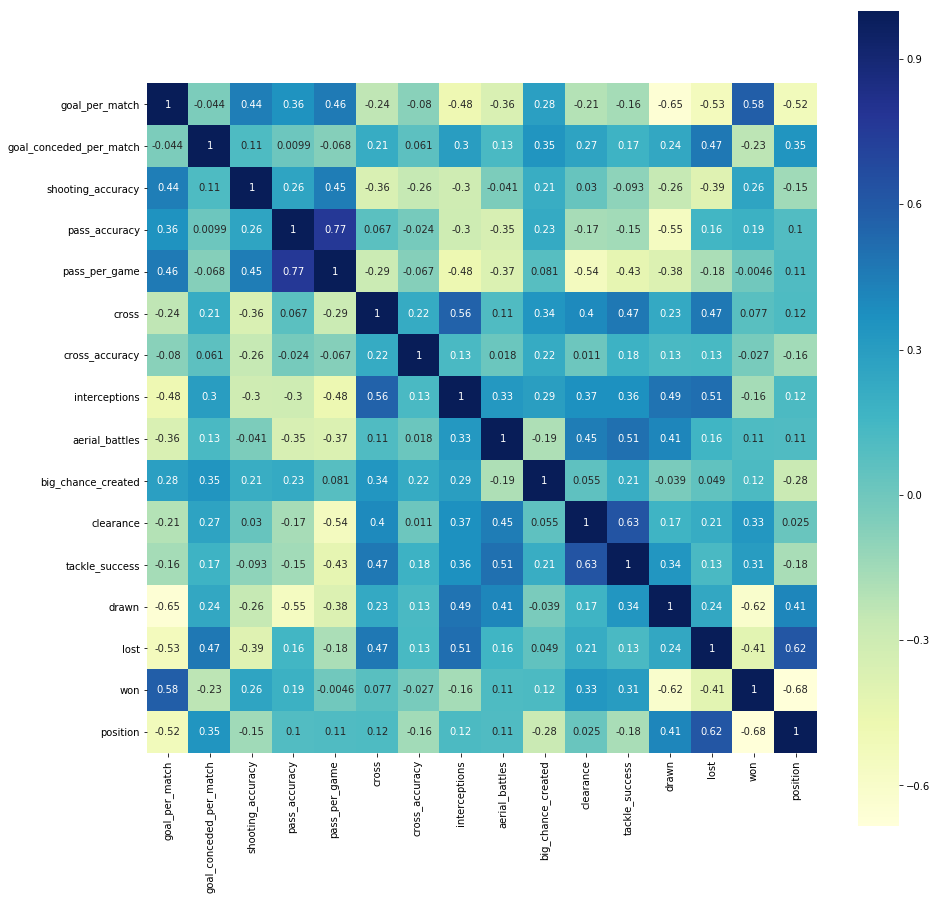

In [258]:
# To visualize the data combine x and Y to final_data
final_data = x.copy()
final_data['position'] = Y

f, ax = plt.subplots(figsize=(15, 15))
corr = final_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), annot=True, cmap='YlGnBu', square=True, ax=ax)

### Insight from heatmap above:  
#### Generally, it looks like 'won', 'lost', 'drawn', 'goal_per_match', 'goal_per_conceded_per_match', and'big_chance_created' has a correlation to position.


In [216]:
# To visualize how each position differ from each other, subset the dataset by positions
position1 = final_data[final_data['position'] == '1']
position2 = final_data[final_data['position'] == '2']
position3 = final_data[final_data['position'] == '3']
position4 = final_data[final_data['position'] == '4']

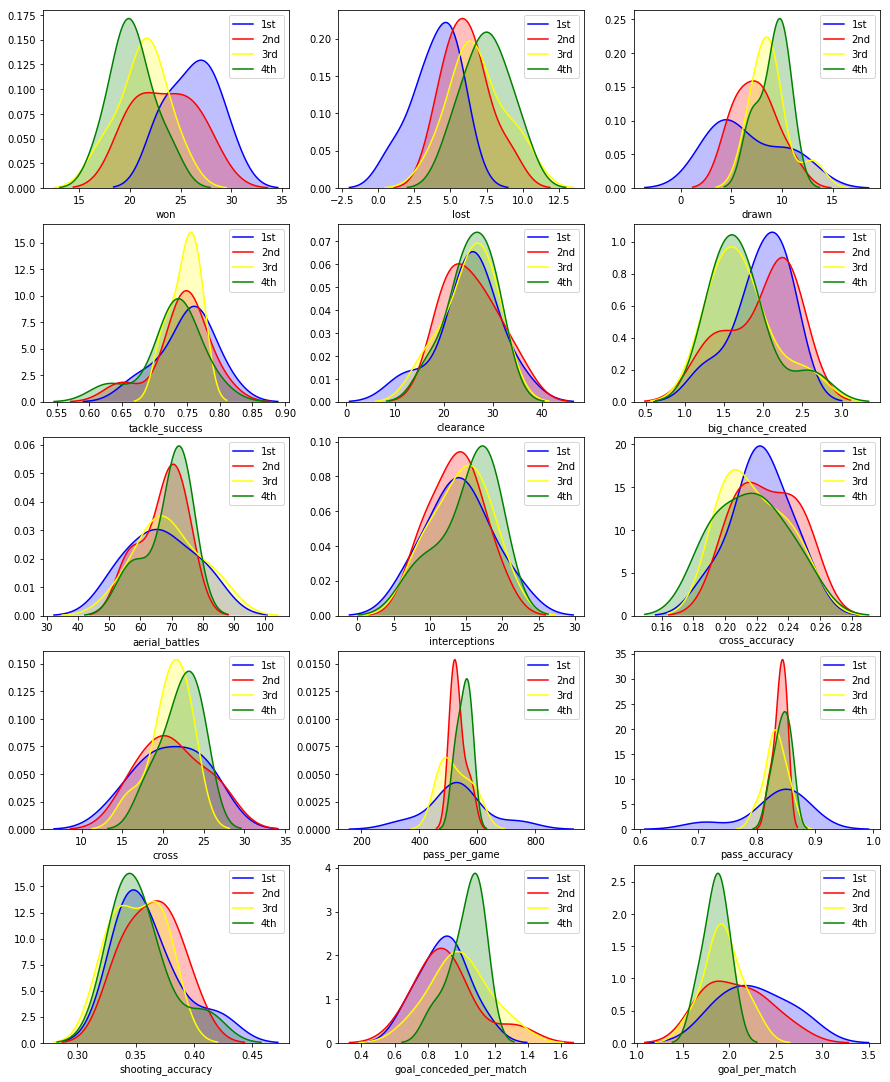

In [217]:
f, axes = plt.subplots(5, 3, figsize=(15, 19))

sns.distplot(position1['won'], hist=False, color='blue', kde_kws={'shade': True}, ax=axes[0, 0], label='1st')
sns.distplot(position2['won'], hist=False, color='red', kde_kws={'shade': True}, ax=axes[0, 0], label='2nd')
sns.distplot(position3['won'], hist=False, color='yellow', kde_kws={'shade': True}, ax=axes[0, 0],label='3rd')
sns.distplot(position4['won'], hist=False, color='green', kde_kws={'shade': True}, ax=axes[0, 0],label='4th')

sns.distplot(position1['lost'], hist=False, color='blue', kde_kws={'shade': True}, ax=axes[0, 1],label='1st')
sns.distplot(position2['lost'], hist=False, color='red', kde_kws={'shade': True}, ax=axes[0, 1], label='2nd')
sns.distplot(position3['lost'], hist=False, color='yellow', kde_kws={'shade': True}, ax=axes[0, 1], label='3rd')
sns.distplot(position4['lost'], hist=False, color='green', kde_kws={'shade': True}, ax=axes[0, 1], label='4th')

sns.distplot(position1['drawn'], hist=False, color='blue', kde_kws={'shade': True}, ax=axes[0, 2],label='1st')
sns.distplot(position2['drawn'], hist=False, color='red', kde_kws={'shade': True}, ax=axes[0, 2], label='2nd')
sns.distplot(position3['drawn'], hist=False, color='yellow', kde_kws={'shade': True}, ax=axes[0, 2], label='3rd')
sns.distplot(position4['drawn'], hist=False, color='green', kde_kws={'shade': True}, ax=axes[0, 2], label='4th')

sns.distplot(position1['tackle_success'], hist=False, color='blue', kde_kws={'shade': True}, ax=axes[1, 0],label='1st')
sns.distplot(position2['tackle_success'], hist=False, color='red', kde_kws={'shade': True}, ax=axes[1, 0], label='2nd')
sns.distplot(position3['tackle_success'], hist=False, color='yellow', kde_kws={'shade': True}, ax=axes[1, 0], label='3rd')
sns.distplot(position4['tackle_success'], hist=False, color='green', kde_kws={'shade': True}, ax=axes[1, 0], label='4th')

sns.distplot(position1['clearance'], hist=False, color='blue', kde_kws={'shade': True}, ax=axes[1, 1],label='1st')
sns.distplot(position2['clearance'], hist=False, color='red', kde_kws={'shade': True}, ax=axes[1, 1], label='2nd')
sns.distplot(position3['clearance'], hist=False, color='yellow', kde_kws={'shade': True}, ax=axes[1, 1], label='3rd')
sns.distplot(position4['clearance'], hist=False, color='green', kde_kws={'shade': True}, ax=axes[1, 1], label='4th')

sns.distplot(position1['big_chance_created'], hist=False, color='blue', kde_kws={'shade': True}, ax=axes[1, 2],label='1st')
sns.distplot(position2['big_chance_created'], hist=False, color='red', kde_kws={'shade': True}, ax=axes[1, 2], label='2nd')
sns.distplot(position3['big_chance_created'], hist=False, color='yellow', kde_kws={'shade': True}, ax=axes[1, 2], label='3rd')
sns.distplot(position4['big_chance_created'], hist=False, color='green', kde_kws={'shade': True}, ax=axes[1, 2], label='4th')

sns.distplot(position1['aerial_battles'], hist=False, color='blue', kde_kws={'shade': True}, ax=axes[2, 0],label='1st')
sns.distplot(position2['aerial_battles'], hist=False, color='red', kde_kws={'shade': True}, ax=axes[2, 0], label='2nd')
sns.distplot(position3['aerial_battles'], hist=False, color='yellow', kde_kws={'shade': True}, ax=axes[2, 0], label='3rd')
sns.distplot(position4['aerial_battles'], hist=False, color='green', kde_kws={'shade': True}, ax=axes[2, 0], label='4th')

sns.distplot(position1['interceptions'], hist=False, color='blue', kde_kws={'shade': True}, ax=axes[2, 1],label='1st')
sns.distplot(position2['interceptions'], hist=False, color='red', kde_kws={'shade': True}, ax=axes[2, 1], label='2nd')
sns.distplot(position3['interceptions'], hist=False, color='yellow', kde_kws={'shade': True}, ax=axes[2, 1], label='3rd')
sns.distplot(position4['interceptions'], hist=False, color='green', kde_kws={'shade': True}, ax=axes[2, 1], label='4th')

sns.distplot(position1['cross_accuracy'], hist=False, color='blue', kde_kws={'shade': True}, ax=axes[2, 2],label='1st')
sns.distplot(position2['cross_accuracy'], hist=False, color='red', kde_kws={'shade': True}, ax=axes[2, 2], label='2nd')
sns.distplot(position3['cross_accuracy'], hist=False, color='yellow', kde_kws={'shade': True}, ax=axes[2, 2], label='3rd')
sns.distplot(position4['cross_accuracy'], hist=False, color='green', kde_kws={'shade': True}, ax=axes[2, 2], label='4th')

sns.distplot(position1['cross'], hist=False, color='blue', kde_kws={'shade': True}, ax=axes[3, 0],label='1st')
sns.distplot(position2['cross'], hist=False, color='red', kde_kws={'shade': True}, ax=axes[3, 0], label='2nd')
sns.distplot(position3['cross'], hist=False, color='yellow', kde_kws={'shade': True}, ax=axes[3, 0], label='3rd')
sns.distplot(position4['cross'], hist=False, color='green', kde_kws={'shade': True}, ax=axes[3, 0], label='4th')

sns.distplot(position1['pass_per_game'], hist=False, color='blue', kde_kws={'shade': True}, ax=axes[3, 1],label='1st')
sns.distplot(position2['pass_per_game'], hist=False, color='red', kde_kws={'shade': True}, ax=axes[3, 1], label='2nd')
sns.distplot(position3['pass_per_game'], hist=False, color='yellow', kde_kws={'shade': True}, ax=axes[3, 1], label='3rd')
sns.distplot(position4['pass_per_game'], hist=False, color='green', kde_kws={'shade': True}, ax=axes[3, 1], label='4th')

sns.distplot(position1['pass_accuracy'], hist=False, color='blue', kde_kws={'shade': True}, ax=axes[3, 2],label='1st')
sns.distplot(position2['pass_accuracy'], hist=False, color='red', kde_kws={'shade': True}, ax=axes[3, 2], label='2nd')
sns.distplot(position3['pass_accuracy'], hist=False, color='yellow', kde_kws={'shade': True}, ax=axes[3, 2], label='3rd')
sns.distplot(position4['pass_accuracy'], hist=False, color='green', kde_kws={'shade': True}, ax=axes[3, 2], label='4th')

sns.distplot(position1['shooting_accuracy'], hist=False, color='blue', kde_kws={'shade': True}, ax=axes[4, 0],label='1st')
sns.distplot(position2['shooting_accuracy'], hist=False, color='red', kde_kws={'shade': True}, ax=axes[4, 0], label='2nd')
sns.distplot(position3['shooting_accuracy'], hist=False, color='yellow', kde_kws={'shade': True}, ax=axes[4, 0], label='3rd')
sns.distplot(position4['shooting_accuracy'], hist=False, color='green', kde_kws={'shade': True}, ax=axes[4, 0], label='4th')

sns.distplot(position1['goal_conceded_per_match'], hist=False, color='blue', kde_kws={'shade': True}, ax=axes[4, 1],label='1st')
sns.distplot(position2['goal_conceded_per_match'], hist=False, color='red', kde_kws={'shade': True}, ax=axes[4, 1], label='2nd')
sns.distplot(position3['goal_conceded_per_match'], hist=False, color='yellow', kde_kws={'shade': True}, ax=axes[4, 1], label='3rd')
sns.distplot(position4['goal_conceded_per_match'], hist=False, color='green', kde_kws={'shade': True}, ax=axes[4, 1], label='4th')

sns.distplot(position1['goal_per_match'], hist=False, color='blue', kde_kws={'shade': True}, ax=axes[4, 2],label='1st')
sns.distplot(position2['goal_per_match'], hist=False, color='red', kde_kws={'shade': True}, ax=axes[4, 2], label='2nd')
sns.distplot(position3['goal_per_match'], hist=False, color='yellow', kde_kws={'shade': True}, ax=axes[4, 2], label='3rd')
sns.distplot(position4['goal_per_match'], hist=False, color='green', kde_kws={'shade': True}, ax=axes[4, 2], label='4th')

### Insight from displots above:  
#### Won: It is clear that 1st teams have higher frequency on high number of wins and consecutively dropping 2nd to 4th.  
#### Lost: Opposite of what Won shows.  
#### Drawn: It similar to Lost, but 3rd and 4th have much more higher frequency on getting high number of draws.
#### Big chance created: There is clear signal that more big chance created is better for team's rank.  
#### Pass per game and Pass accuracy: 1st teams usually have dispersive range of the features than other ranks  
#### Goal conceded per match: 4th teams has much more goal conceded than other ranks  
#### Goal per match: 1st and 2nd has dispersive range of goal per match, but 3rd and 4th has a lot of goals between 1.5 to 2.5.
#### Tackle Success, Clearance, Aerial battles, Interceptions, Cross accuracy, Cross, Shooting accuracy: I do not see much information on this plot.  
### Let's see if my visual analysis is relevantly correct by using backward elimination and feature selection model from scikit-learn(KBest)

In [403]:
# Load ML models
logist_model = LogisticRegression(random_state = 50)
svm_model = svm.SVC(gamma='scale', decision_function_shape='ovo')
xb_model = XGBClassifier()
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier()

In [404]:
selector_logist = RFE(logist_model, 5, step=1)
selector_svm = RFE(svm_model, 5, step=1)
selector_xb = RFE(xb_model, 5, step=1)
selector_knn = RFE(knn_model, 5, step=1)
selector_rf = RFE(rf_model, 5, step=1)

In [304]:
selector_logist = selector_logist.fit(x, Y)
print(selector_logist.support_, '\n', selector_logist.ranking_, '\n', x.columns)

[False  True False False False False False  True False  True False False
  True  True False] 
 [ 5  1  8  6 11  3 10  1  7  1  4  9  1  1  2] 
 Index(['goal_per_match', 'goal_conceded_per_match', 'shooting_accuracy',
       'pass_accuracy', 'pass_per_game', 'cross', 'cross_accuracy',
       'interceptions', 'aerial_battles', 'big_chance_created', 'clearance',
       'tackle_success', 'drawn', 'lost', 'won'],
      dtype='object')


#### Logistics Regression: goal_conceded_per_match, interceptions, big_chance_created, drawn, lost

In [311]:
logist_x = x[['goal_conceded_per_match', 'interceptions', 'big_chance_created', 'drawn', 'lost']]
logist_x.head()

goal_conceded_per_match  interceptions  big_chance_created  drawn  lost
0                     0.95      19.315789            2.315789     11     7
1                     0.95      20.052632            1.736842      9     7
2                     1.08      14.236842            1.631579      7     7
3                     0.97      16.736842            1.842105     10     7
4                     1.29      15.921053            2.552632      7    10

In [285]:
selector_xb = selector_xb.fit(x, Y)
print(selector_xb.support_, '\n', selector_xb.ranking_, '\n', x.columns)

[False False False  True  True False False False False False False False
  True  True  True] 
 [ 3  6 11  1  1 10  7  9  8  2  4  5  1  1  1] 
 Index(['goal_per_match', 'goal_conceded_per_match', 'shooting_accuracy',
       'pass_accuracy', 'pass_per_game', 'cross', 'cross_accuracy',
       'interceptions', 'aerial_battles', 'big_chance_created', 'clearance',
       'tackle_success', 'drawn', 'lost', 'won'],
      dtype='object')


#### Xgboost: pass_accuracy, pass_per_game, drawn, lost, won

In [313]:
xb_x = x[['pass_accuracy', 'pass_per_game', 'drawn', 'lost', 'won']]
xb_x.head()

pass_accuracy  pass_per_game  drawn  lost  won
0           0.84         559.18     11     7   20
1           0.84         540.18      9     7   22
2           0.86         567.39      7     7   24
3           0.86         555.53     10     7   21
4           0.85         542.08      7    10   21

In [286]:
selector_rf = selector_rf.fit(x, Y)
print(selector_rf.support_, '\n', selector_rf.ranking_, '\n', x.columns)

[ True  True False False  True False False False False  True False False
 False  True False] 
 [ 1  1  7 10  1  4  2  5  9  1  6 11  8  1  3] 
 Index(['goal_per_match', 'goal_conceded_per_match', 'shooting_accuracy',
       'pass_accuracy', 'pass_per_game', 'cross', 'cross_accuracy',
       'interceptions', 'aerial_battles', 'big_chance_created', 'clearance',
       'tackle_success', 'drawn', 'lost', 'won'],
      dtype='object')


#### Random Forest: goal_per_match, goal_conceded_per_match, pass_per_game, big_chance_created, lost

In [314]:
rf_x = x[['goal_per_match', 'goal_conceded_per_match', 'pass_per_game', 'big_chance_created', 'lost']]
rf_x.head()

goal_per_match  goal_conceded_per_match  pass_per_game  big_chance_created  \
0            1.71                     0.95         559.18            2.315789   
1            1.87                     0.95         540.18            1.736842   
2            1.79                     1.08         567.39            1.631579   
3            1.89                     0.97         555.53            1.842105   
4            1.95                     1.29         542.08            2.552632   

   lost  
0     7  
1     7  
2     7  
3     7  
4    10

#### SVM and KNN does not provie logic to rank the feature; therefore, we cannot implement this method.  
#### For SVM and KNN, feature will be selected according to EDA

In [319]:
x_knn_svm = x[['goal_per_match', 'goal_conceded_per_match', 'drawn', 'lost', 'won']]
x_knn_svm.head()

goal_per_match  goal_conceded_per_match  drawn  lost  won
0            1.71                     0.95     11     7   20
1            1.87                     0.95      9     7   22
2            1.79                     1.08      7     7   24
3            1.89                     0.97     10     7   21
4            1.95                     1.29      7    10   21

# Ignore --------------------------------------------

### Normalization vs Standardization
It is hard to find out which method is beter for the performance.

In [223]:
# Normalization
normalized_data = pd.DataFrame(preprocessing.normalize(x))
# Standardization
standardization_data = pd.DataFrame(preprocessing.scale(x))

In [224]:
normalized_data.head()

0         1         2         3         4         5         6   \
0  0.003023  0.001680  0.000654  0.001485  0.988654  0.035082  0.000442   
1  0.003407  0.001731  0.000674  0.001530  0.984069  0.041517  0.000364   
2  0.003118  0.001881  0.000714  0.001498  0.988360  0.034518  0.000383   
3  0.003361  0.001725  0.000605  0.001529  0.987880  0.044503  0.000338   
4  0.003563  0.002357  0.000676  0.001553  0.990608  0.043089  0.000402   

         7         8         9         10        11        12        13  \
0  0.034151  0.129579  0.004094  0.039502  0.001291  0.019448  0.012376   
1  0.036531  0.155423  0.003164  0.048228  0.001366  0.016396  0.012752   
2  0.024800  0.127299  0.002842  0.055330  0.001289  0.012194  0.012194   
3  0.029763  0.132902  0.003276  0.040853  0.001405  0.017783  0.012448   
4  0.029094  0.112338  0.004665  0.036837  0.001352  0.012792  0.018274   

         14  
0  0.035361  
1  0.040078  
2  0.041807  
3  0.037344  
4  0.038376

In [225]:
standardization_data.head()

0         1         2         3         4         5         6   \
0 -1.070273 -0.058261  0.514630  0.097832  0.399499 -0.455723  1.534938   
1 -0.543875 -0.058261  0.514630  0.097832  0.071382  0.474938 -1.105815   
2 -0.807074  0.777480  2.203673  0.793525  0.541281 -0.464032 -0.049514   
3 -0.478076  0.070315 -0.752152  0.793525  0.336466  1.181243 -1.633966   
4 -0.280677  2.127523  0.514630  0.445679  0.104193  0.724222 -0.049514   

         7         8         9         10        11        12        13  \
0  1.333906  0.640064  1.180891 -0.587181 -0.291434  1.224745  0.428393   
1  1.528592  2.075913 -0.298375  0.218609  0.241474  0.408248  0.428393   
2 -0.008040  0.614929 -0.567332  1.250225 -0.024980 -0.408248  0.428393   
3  0.652503  0.812869 -0.029417 -0.464003  1.307290  0.816497  0.428393   
4  0.436958 -0.770650  1.786045 -1.013171 -0.024980 -0.408248  1.897169   

         14  
0 -0.849359  
1 -0.245370  
2  0.358618  
3 -0.547365  
4 -0.547365

# Ignore --------------------------------------------

## Test ML models
a. Multinomial Logistic Regression  
b. Support Vector Machine  
c. XG boost  
d. Knn  
e. Random Forest

In [405]:
data_shuffled = shuffle(final_data).reset_index(drop=True)

train = data_shuffled.iloc[:21]
test = data_shuffled.iloc[21:]

In [406]:
x_train = train.loc[:, train.columns != 'position']
y_train = train.loc[:, train.columns == 'position']

x_test = test.loc[:, test.columns != 'position']
y_test = test.loc[:, test.columns == 'position']

In [407]:
logist_model = logist_model.fit(x_train[logist_x.columns], y_train)
svm_model = svm_model.fit(x_train[x_knn_svm.columns], y_train)
xb_model = xb_model.fit(x_train[xb_x.columns], y_train)
knn_model = knn_model.fit(x_train[x_knn_svm.columns], y_train)
rf_model = rf_model.fit(x_train[rf_x.columns], y_train)

In [408]:
# Accuracy Score
print('Logistic Regression: ', accuracy_score(y_train, logist_model.predict(x_train[logist_x.columns])),'\n'
      , 'SVM: ', accuracy_score(y_train, svm_model.predict(x_train[x_knn_svm.columns])), '\n'
      , 'Xgboost: ', accuracy_score(y_train, xb_model.predict(x_train[xb_x.columns])), '\n'
      , 'KNN: ', accuracy_score(y_train, knn_model.predict(x_train[x_knn_svm.columns])), '\n'
      , 'Random Forest: ', accuracy_score(y_train, rf_model.predict(x_train[rf_x.columns]))
     ) 

Logistic Regression:  0.6666666666666666 
 SVM:  0.47619047619047616 
 Xgboost:  1.0 
 KNN:  0.6666666666666666 
 Random Forest:  1.0


In [447]:
print('Logistic Regression: ', accuracy_score(y_test, logist_model.predict(x_test[logist_x.columns])),'\n'
      , 'SVM: ', accuracy_score(y_test, svm_model.predict(x_test[x_knn_svm.columns])), '\n'
      , 'Xgboost: ', accuracy_score(y_test, xb_model.predict(x_test[xb_x.columns])), '\n'
      , 'KNN: ', accuracy_score(y_test, knn_model.predict(x_test[x_knn_svm.columns])), '\n'
      , 'Random Forest: ', accuracy_score(y_test, rf_model.predict(x_test[rf_x.columns]))
     ) 

Logistic Regression:  0.09090909090909091 
 SVM:  0.18181818181818182 
 Xgboost:  0.18181818181818182 
 KNN:  0.5454545454545454 
 Random Forest:  0.36363636363636365


### We can clearly see the models are overfitting due to the low volume of dataset

# 4. Choose the best model to predict the final table

### Based on the prediction above, XG boost model seems to be the best model. Therefore, XG boost model will be used in the final prediction.

### Getting the 2017/18 data for final prediction
1. current standing table
2. current club's match data

In [435]:
table2017 = pd.read_csv('/Users/hyunilyoo/Documents/analytics/epl_prediction/table2017_crawler/table2017.csv')
table2017

club_name  drawn  goal  goal_against  lost  points  \
0            Manchester City      3    83            20     1      78   
1          Manchester United      5    56            22     5      62   
2                  Liverpool      9    67            32     3      60   
3          Tottenham Hotspur      7    55            24     5      58   
4                    Chelsea      5    50            26     8      53   
5                    Arsenal      6    52            41    10      45   
6                    Burnley     10    24            26     9      40   
7             Leicester City     10    41            42    10      37   
8                    Watford      6    39            47    13      36   
9   Brighton and Hove Albion     10    28            38    11      34   
10                   Everton      7    33            49    13      34   
11               Bournemouth      9    34            44    12      33   
12              Swansea City      6    25            42    15      30   
13           West Ham United      9    36            54    13      30   
14         Huddersfield Town      6    25            50    15      30   
15          Newcastle United      8    27            40    14      29   
16               Southampton     13    29            41    11      28   
17            Crystal Palace      9    27            46    14      27   
18                Stoke City      9    28            54    14      27   
19      West Bromwich Albion     11    22            43    15      20   

    position  won  
0          1   25  
1          2   19  
2          3   17  
3          4   17  
4          5   16  
5          6   13  
6          7   10  
7          8    9  
8          9   10  
9         10    8  
10        11    9  
11        12    8  
12        13    8  
13        14    7  
14        15    8  
15        16    7  
16        17    5  
17        18    6  
18        19    6  
19        20    3

### Bournemouth has to be changed as AFC Bournemouth because club's match data has it as AFC Bournemouth. Therefore, it has to be changed to join the data frame.

In [436]:
table2017 = table2017[['club_name', 'won', 'drawn', 'lost', 'goal', 'goal_against', 'points', 'position']]
table2017.iat[11,0] = 'AFC Bournemouth'
table2017

club_name  won  drawn  lost  goal  goal_against  points  \
0            Manchester City   25      3     1    83            20      78   
1          Manchester United   19      5     5    56            22      62   
2                  Liverpool   17      9     3    67            32      60   
3          Tottenham Hotspur   17      7     5    55            24      58   
4                    Chelsea   16      5     8    50            26      53   
5                    Arsenal   13      6    10    52            41      45   
6                    Burnley   10     10     9    24            26      40   
7             Leicester City    9     10    10    41            42      37   
8                    Watford   10      6    13    39            47      36   
9   Brighton and Hove Albion    8     10    11    28            38      34   
10                   Everton    9      7    13    33            49      34   
11           AFC Bournemouth    8      9    12    34            44      33   
12              Swansea City    8      6    15    25            42      30   
13           West Ham United    7      9    13    36            54      30   
14         Huddersfield Town    8      6    15    25            50      30   
15          Newcastle United    7      8    14    27            40      29   
16               Southampton    5     13    11    29            41      28   
17            Crystal Palace    6      9    14    27            46      27   
18                Stoke City    6      9    14    28            54      27   
19      West Bromwich Albion    3     11    15    22            43      20   

    position  
0          1  
1          2  
2          3  
3          4  
4          5  
5          6  
6          7  
7          8  
8          9  
9         10  
10        11  
11        12  
12        13  
13        14  
14        15  
15        16  
16        17  
17        18  
18        19  
19        20

In [437]:
table2017['position'] = table2017['position'].astype(object)

In [438]:
stats2017 = pd.read_csv('/Users/hyunilyoo/Documents/analytics/epl_prediction/clubstats2017_crawler/club_stats_2017.csv')

In [439]:
stats2017.head()

aerial_battles  big_chance_created  clearance          club_name  cross  \
0          2,061                  60        616            Arsenal    438   
1          2,588                  38        865         Stoke City    481   
2          2,357                  28        811    West Ham United    574   
3          2,025                  61        624  Tottenham Hotspur    651   
4          2,405                  33        735            Watford    550   

  cross_accuracy  goal_conceded_per_match  goal_per_match  interceptions  \
0            21%                     1.41            1.79            336   
1            24%                     1.86            0.97            361   
2            21%                     1.86            1.24            368   
3            20%                     0.83            1.90            277   
4            23%                     1.62            1.34            359   

  pass_accuracy  pass_per_game shooting_accuracy  shot_on_target  \
0           84%         629.52               38%             176   
1           73%         351.90               33%             104   
2           75%         373.79               38%             102   
3           84%         576.62               33%             168   
4           76%         418.00               27%              95   

  tackle_success  
0            69%  
1            66%  
2            67%  
3            63%  
4            64%

In [440]:
# Get rid of unnecessary signs
def clean_sign_2017(club):
    """Excluding non-numeric values such as comma and %"""
    club['cross_accuracy'] = club['cross_accuracy'].map(lambda x: x.rstrip('%'))
    club['pass_accuracy'] = club['pass_accuracy'].map(lambda x: x.rstrip('%'))
    club['shooting_accuracy'] = club['shooting_accuracy'].map(lambda x: x.rstrip('%')) 
    club['tackle_success'] = club['tackle_success'].map(lambda x: x.rstrip('%'))
    club['aerial_battles'] = club['aerial_battles'].str.replace(',','')
    
clean_sign_2017(stats2017)
stats2017

aerial_battles  big_chance_created  clearance                 club_name  \
0            2061                  60        616                   Arsenal   
1            2588                  38        865                Stoke City   
2            2357                  28        811           West Ham United   
3            2025                  61        624         Tottenham Hotspur   
4            2405                  33        735                   Watford   
5            2114                  34        681               Southampton   
6            2219                  27        756      West Bromwich Albion   
7            2390                  36        914          Newcastle United   
8            2069                  20        724              Swansea City   
9            2142                  27        976                   Everton   
10           2359                  37        746            Crystal Palace   
11           2274                  31        722            Leicester City   
12           2039                  46        563                   Chelsea   
13           2269                  21        813         Huddersfield Town   
14           1977                  64        585                 Liverpool   
15           2079                  48        686         Manchester United   
16           1915                  76        449           Manchester City   
17           2060                  23        783           AFC Bournemouth   
18           2165                  30        838  Brighton and Hove Albion   
19           2335                  25        913                   Burnley   

    cross cross_accuracy  goal_conceded_per_match  goal_per_match  \
0     438             21                     1.41            1.79   
1     481             24                     1.86            0.97   
2     574             21                     1.86            1.24   
3     651             20                     0.83            1.90   
4     550             23                     1.62            1.34   
5     641             21                     1.41            1.00   
6     608             24                     1.48            0.76   
7     456             21                     1.38            0.93   
8     528             20                     1.45            0.86   
9     459             24                     1.69            1.14   
10    582             25                     1.59            0.93   
11    534             19                     1.45            1.41   
12    565             20                     0.90            1.72   
13    559             16                     1.72            0.86   
14    570             23                     1.10            2.31   
15    598             20                     0.76            1.93   
16    532             21                     0.69            2.86   
17    522             21                     1.52            1.17   
18    531             22                     1.31            0.97   
19    535             27                     0.90            0.83   

    interceptions pass_accuracy  pass_per_game shooting_accuracy  \
0             336            84         629.52                38   
1             361            73         351.90                33   
2             368            75         373.79                38   
3             277            84         576.62                33   
4             359            76         418.00                27   
5             355            79         475.55                29   
6             363            72         345.72                30   
7             328            72         356.93                34   
8             298            78         417.03                29   
9             416            74         386.41                33   
10            426            75         371.31                29   
11            303            74         395.66                34   
12            302            8

### Averaging the data that are not in average.

In [441]:
data_transform(stats2017)

def for_stats17(club):
    club['aerial_battles'] = club['aerial_battles'] / 29
    club['interceptions'] = club['interceptions'] / 29
    club['cross'] = club['cross'] / 29
    club['clearance'] = club['clearance'] / 29
    club['big_chance_created'] = club['big_chance_created'] / 29
    club['shot_on_target'] = club['shot_on_target'] / 29
    club['cross_accuracy'] = club['cross_accuracy'] / 100
    club['pass_accuracy'] = club['pass_accuracy'] / 100
    club['shooting_accuracy'] = club['shooting_accuracy'] / 100
    club['tackle_success'] = club['tackle_success'] / 100

In [442]:
for_stats17(stats2017)

In [443]:
col_order(stats2017)

club_name  goal_per_match  goal_conceded_per_match  \
0                    Arsenal            1.79                     1.41   
1                 Stoke City            0.97                     1.86   
2            West Ham United            1.24                     1.86   
3          Tottenham Hotspur            1.90                     0.83   
4                    Watford            1.34                     1.62   
5                Southampton            1.00                     1.41   
6       West Bromwich Albion            0.76                     1.48   
7           Newcastle United            0.93                     1.38   
8               Swansea City            0.86                     1.45   
9                    Everton            1.14                     1.69   
10            Crystal Palace            0.93                     1.59   
11            Leicester City            1.41                     1.45   
12                   Chelsea            1.72                     0.90   
13         Huddersfield Town            0.86                     1.72   
14                 Liverpool            2.31                     1.10   
15         Manchester United            1.93                     0.76   
16           Manchester City            2.86                     0.69   
17           AFC Bournemouth            1.17                     1.52   
18  Brighton and Hove Albion            0.97                     1.31   
19                   Burnley            0.83                     0.90   

    shooting_accuracy  shot_on_target  pass_accuracy  pass_per_game  \
0                0.38        6.068966           0.84         629.52   
1                0.33        3.586207           0.73         351.90   
2                0.38        3.517241           0.75         373.79   
3                0.33        5.793103           0.84         576.62   
4                0.27        3.275862           0.76         418.00   
5                0.29        3.586207           0.79         475.55   
6                0.30        2.965517           0.72         345.72   
7                0.34        4.103448           0.72         356.93   
8                0.29        2.482759           0.78         417.03   
9                0.33        3.000000           0.74         386.41   
10               0.29        3.758621           0.75         371.31   
11               0.34        3.689655           0.74         395.66   
12               0.38        6.034483           0.84         556.28   
13               0.33        3.000000           0.74         387.86   
14               0.37        6.344828           0.83         593.55   
15               0.36        5.034483           0.83         519.79   
16               0.42        7.310345           0.89         733.21   
17               0.35        4.103448           0.77         423.62   
18               0.30        3.103448           0.76         400.52   
19               0.32        3.241379           0.70         352.10   

        cross  cross_accuracy  interceptions  aerial_battles  \
0   15.103448            0.21      11.586207       71.068966   
1   16.586207            0.24      12.448276       89.241379   
2   19.793103            0.21      12.689655       81.275862   
3   22.448276            0.20       9.551724       69.827586   
4   18.965517            0.23      12.379310       82.931034   
5   22.103448            0.21      12.241379       72.896552   
6   20.965517            0.24      12.517241       76.517241   
7   15.724138            0.21      11.310345       82.413793   
8   18.206897            0.20      10.275862       71.344828   
9   15.827586            0.24      14.344828       73.862069   
10  20.068966            0.25      14.689655       81.344828   
11  18.413793            0.19      10.448276       78.413793   
12  19.482759            0.20      10.413793       70.310345   
13  19.275862            0.16      13.137931       78.241379   
14  19.655172            0.23    

In [444]:
dataset = stats2017.join(table2017.set_index('club_name'), on = 'club_name')
dataset = dataset[['club_name', 'position','goal_per_match', 'goal_conceded_per_match', 'shooting_accuracy', 'shot_on_target', 'pass_accuracy', 
        'pass_per_game', 'cross', 'cross_accuracy', 'interceptions', 'aerial_battles', 'big_chance_created', 'clearance', 
        'tackle_success', 'drawn', 'goal', 'goal_against', 'lost', 'points', 'won']]

In [431]:
data_2017 = dataset.drop(['club_name', 'position'], axis= 1)


variables = [['won','points','goal_per_match', 'goal_conceded_per_match','shooting_accuracy','shot_on_target',
                       'pass_accuracy', 'pass_per_game','cross', 'cross_accuracy','interceptions', 'aerial_battles',
                       'big_chance_created', 'clearance', 'tackle_success', 'drawn', 'goal', 'lost']]
# Make every value in the same scale.
for variable in variables:
    data_2017[variable] = scale(data_2017[variable])

In [445]:
dataset

club_name position  goal_per_match  \
0                    Arsenal        6            1.79   
1                 Stoke City       19            0.97   
2            West Ham United       14            1.24   
3          Tottenham Hotspur        4            1.90   
4                    Watford        9            1.34   
5                Southampton       17            1.00   
6       West Bromwich Albion       20            0.76   
7           Newcastle United       16            0.93   
8               Swansea City       13            0.86   
9                    Everton       11            1.14   
10            Crystal Palace       18            0.93   
11            Leicester City        8            1.41   
12                   Chelsea        5            1.72   
13         Huddersfield Town       15            0.86   
14                 Liverpool        3            2.31   
15         Manchester United        2            1.93   
16           Manchester City        1            2.86   
17           AFC Bournemouth       12            1.17   
18  Brighton and Hove Albion       10            0.97   
19                   Burnley        7            0.83   

    goal_conceded_per_match  shooting_accuracy  shot_on_target  pass_accuracy  \
0                      1.41               0.38        6.068966           0.84   
1                      1.86               0.33        3.586207           0.73   
2                      1.86               0.38        3.517241           0.75   
3                      0.83               0.33        5.793103           0.84   
4                      1.62               0.27        3.275862           0.76   
5                      1.41               0.29        3.586207           0.79   
6                      1.48               0.30        2.965517           0.72   
7                      1.38               0.34        4.103448           0.72   
8                      1.45               0.29        2.482759           0.78   
9                      1.69               0.33        3.000000           0.74   
10                     1.59               0.29        3.758621           0.75   
11                     1.45               0.34        3.689655           0.74   
12                     0.90               0.38        6.034483           0.84   
13                     1.72               0.33        3.000000           0.74   
14                     1.10               0.37        6.344828           0.83   
15                     0.76               0.36        5.034483           0.83   
16                     0.69               0.42        7.310345           0.89   
17                     1.52               0.35        4.103448           0.77   
18                     1.31               0.30        3.103448           0.76   
19                     0.90               0.32        3.241379           0.70   

    pass_per_game      cross  cross_accuracy  interceptions  aerial_battles  \
0          629.52  15.103448            0.21      11.586207       71.068966   
1          351.90  16.586207            0.24      12.448276       89.241379   
2          373.79  19.793103            0.21      12.689655       81.275862   
3          576.62  22.448276            0.20       9.551724       69.827586   
4          418.00  18.965517            0.23      12.379310       82.931034   
5          475.55  22.103448            0.21      12.241379       72.896552   
6          345.72  20.965517            0.24      12.517241       76.517241   
7          356.93  15.724138            0.21      11.310345       82.413793   
8          417.03  18.206897            0.20      10.275862       71.344828   
9          386.41  15.827586            0.24      14.344828       73.862069   
10         371.31  20.068966            0.25      14.689655       81.344828   
11         395.66  18.413793            0.19      10.448276       78.413793   
12         556.28  19.482759            0.20      10.413793       70.310345   
13         38

In [65]:
p_logist_position = logist

In [ ]:
logist_model = logist_model.fit(x_train[logist_x.columns], y_train)
svm_model = svm_model.fit(x_train[x_knn_svm.columns], y_train)
xb_model = xb_model.fit(x_train[xb_x.columns], y_train)
knn_model = knn_model.fit(x_train[x_knn_svm.columns], y_train)
rf_model = rf_model.fit(x_train[rf_x.columns], y_train)

In [66]:
final_table= table2017.drop(['won', 'drawn', 'lost', 'goal', 'goal_against', 'points'],axis=1)

In [67]:
final_table['predicted position'] = p_position
final_table

club_name position predicted position
0            Manchester City        1                  1
1          Manchester United        2                  4
2                  Liverpool        3                  4
3          Tottenham Hotspur        4                  1
4                    Chelsea        5                  4
5                    Arsenal        6                  3
6                    Burnley        7                  4
7             Leicester City        8                  4
8                    Watford        9                  3
9   Brighton and Hove Albion       10                  1
10                   Everton       11                  4
11           AFC Bournemouth       12                  3
12              Swansea City       13                  2
13           West Ham United       14                  3
14         Huddersfield Town       15                  1
15          Newcastle United       16                  3
16               Southampton       17                  1
17            Crystal Palace       18                  4
18                Stoke City       19                  4
19      West Bromwich Albion       20                  4

### This is the final table that is predicted from the model. However, there are many teams that get high predicted position because the model that I made is based on the only top4 of the table; thus, I might exclude the variables that differenciate other positions that is below 4.

### Let see the prediction on the teams that was chosen from the beginning of the project.

In [68]:
final_table = final_table[(final_table['club_name'] == 'Manchester City') | (final_table['club_name'] == 'Manchester United')|
                          (final_table['club_name'] == 'Liverpool') | (final_table['club_name'] == 'Tottenham Hotspur')|
                          (final_table['club_name'] == 'Chelsea') | (final_table['club_name'] == 'Leicester City')]

In [69]:
final_table

club_name position predicted position
0    Manchester City        1                  1
1  Manchester United        2                  4
2          Liverpool        3                  4
3  Tottenham Hotspur        4                  1
4            Chelsea        5                  4
7     Leicester City        8                  4